In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Random
from random import random
from random import randrange
from random import gauss

# plt.rc("figure",figsize=(20,20))

In [202]:
%config InlineBackend.figure_format = 'retina'

In [203]:
import warnings
warnings.filterwarnings('ignore')

In [204]:
import statsmodels.api as sm

# AutoRegressive Models (AR)

Reference:
https://otexts.com/fpp3/AR.html

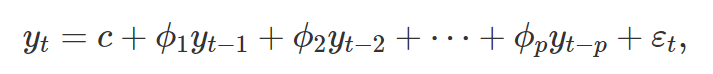

It's basically a model with a constant value *C* summed with the series itself lagged by some nome till *p*. In other words, its the Linear Combination of the lagged serie itself

## Creating an AR model 'from scratch'

### AR(1)


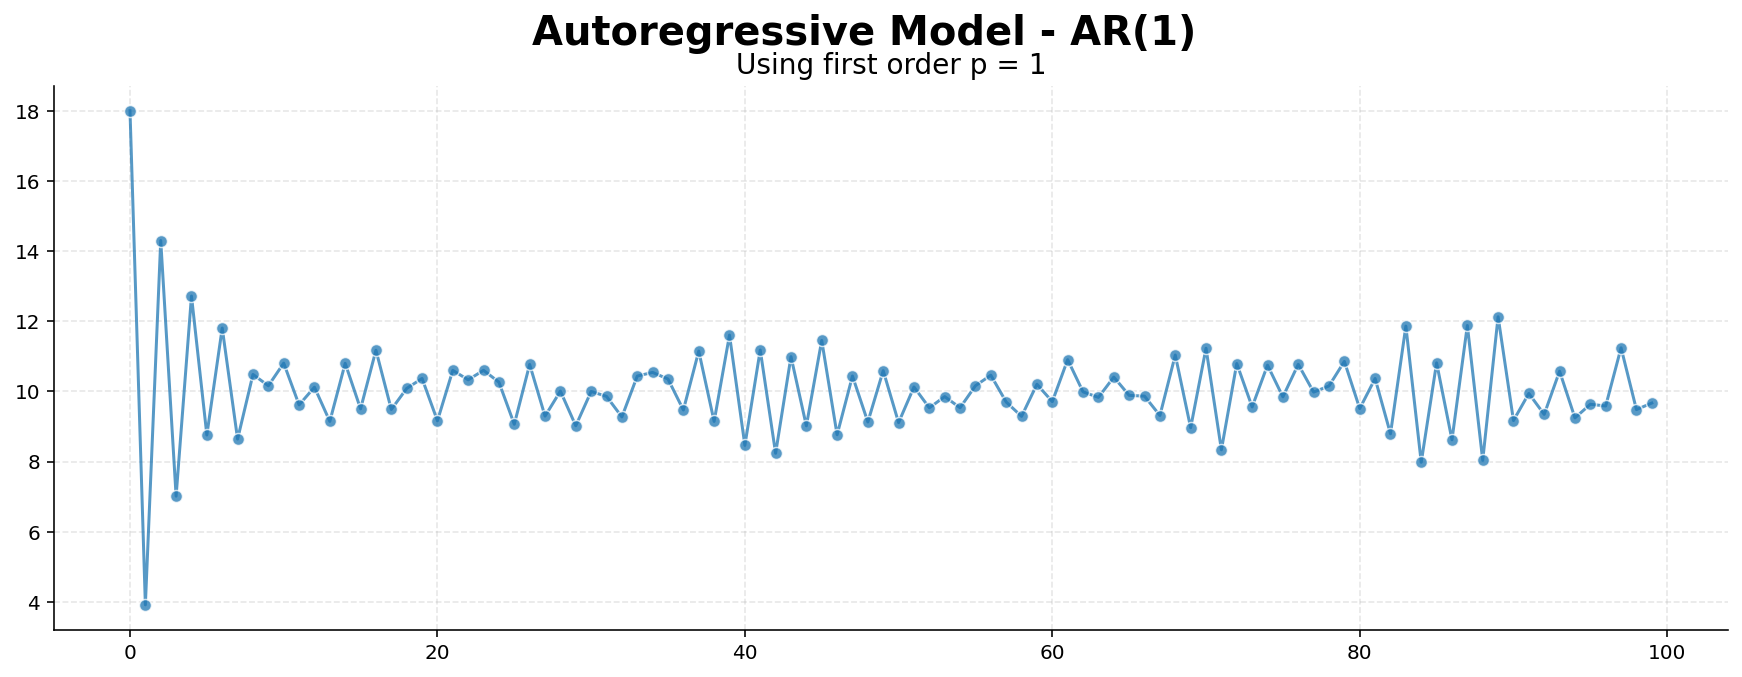

In [205]:
# A drift value C
C = 18

# Timeseries
y = list()

# Size of TS
SZ = 100

# Start with a initial value
y.append(C)

# Coefficient of the lagged TS
PHI = [-0.8]

for t in range(1,SZ):
    Et = 2*(random()-0.5)
    
    # New y_value i.e, y[t]
    y_value = C + PHI[0]*y[t-1] + Et
    
    y.append(y_value)

    
# Creating a Series from it
ts = pd.Series(y)


# PLOT ___________________________________________
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
sns.lineplot(data=ts, ax=ax, linestyle='-', alpha=.75, marker='o');
ax.grid();
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle='--', alpha=0.3);
plt.suptitle("Autoregressive Model - AR(1)",
             fontsize=20,
             fontweight='bold');

plt.title("Using first order p = 1", fontsize=14);

### AR(2)

Same equation below, but AR(2) - i.e, a y(t-2) element

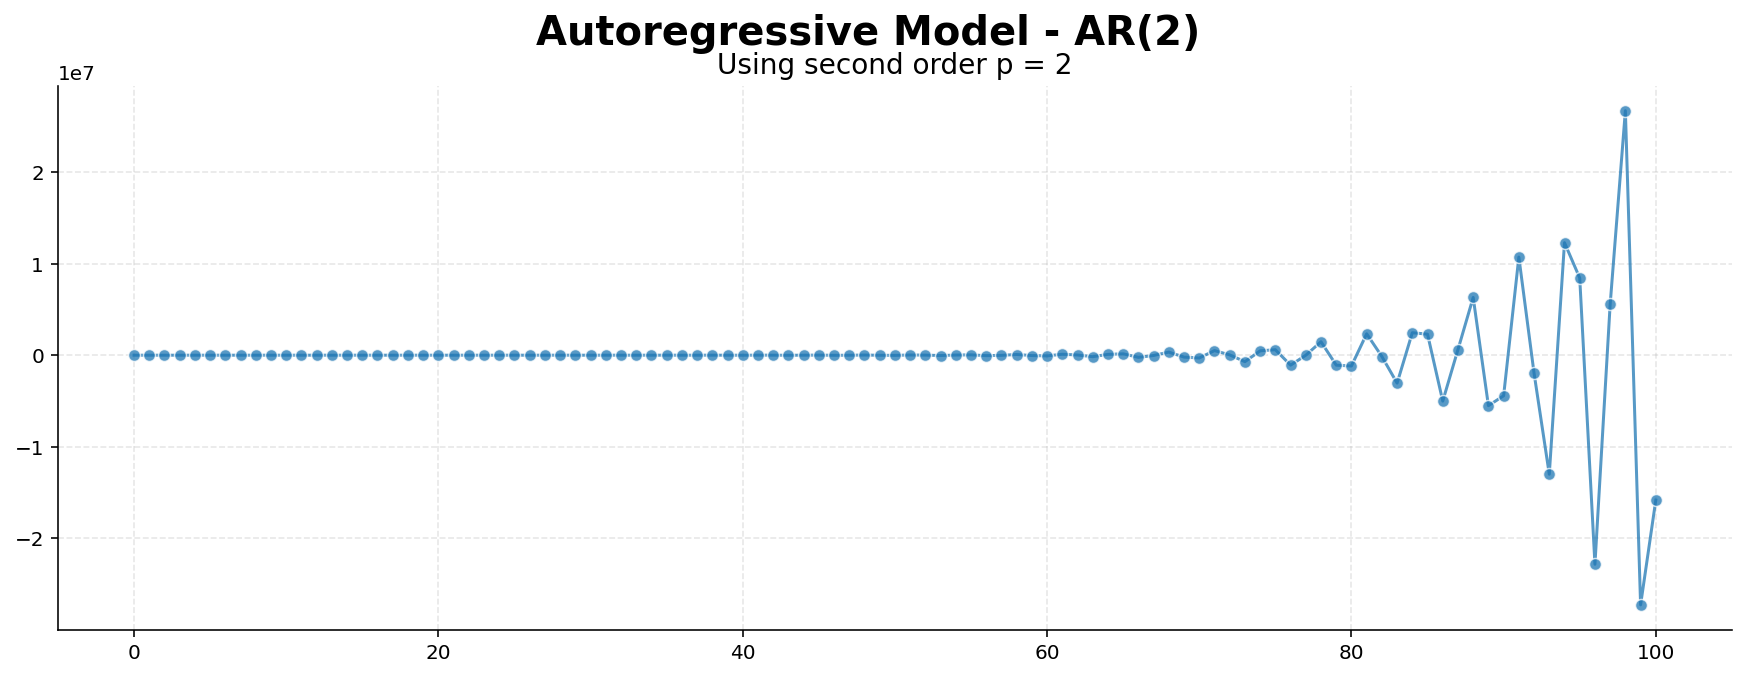

In [206]:
# A drift value C
C = 18

# Timeseries
y = list()

# Size of TS
SZ = 100

# Start with a initial value
y.append(C)
y.append(C*2)

# Coefficient of the lagged TS
PHI = [-0.8, 1]

for t in range(1,SZ):
    Et = 2*(random()-0.5)
    
    # New y_value i.e, y[t]
    y_value = C + PHI[0]*y[t-1] + PHI[1]*y[t-2] + Et
    
    y.append(y_value)
    
    
# Creating a Series from it
ts = pd.Series(y)


# PLOT ___________________________________________
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
sns.lineplot(data=ts, ax=ax, linestyle='-', alpha=.75, marker='o');
ax.grid();
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle='--', alpha=0.3);
plt.suptitle("Autoregressive Model - AR(2)",
             fontsize=20,
             fontweight='bold');

plt.title("Using second order p = 2", fontsize=14);

# Analysing Each AR parameter

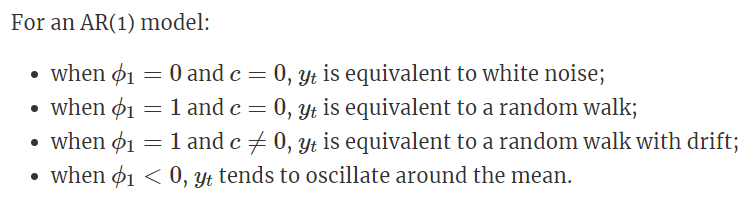

In [214]:
# Lets create a function to vary the parameters

In [215]:
def AR_1(C, PHI):
    # Timeseries
    y = list()

    # Size of TS
    SZ = 100

    # Start with a initial value
    y.append(C)

    # Creating the TS
    for t in range(1,SZ):
#         step = random()
#         Et = -step if (random() > 0.5) else step
        Et = gauss(0.0, 1.0)
    
        # New y_value i.e, y[t]
        y_value = C + PHI*y[t-1] + Et
        y.append(y_value)

    # Creating a Series from it
    ts = pd.Series(y)
    return ts

In [216]:
def plotting(ts, C, PHI, title):
    # PLOT ___________________________________________
    fig, ax = plt.subplots(ncols=1, figsize = (15,5))
    sns.lineplot(data=ts, ax=ax, linestyle='-', alpha=.75, marker='o');
    ax.grid();
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(linestyle='--', alpha=0.3);
    plt.suptitle(title,
                 fontsize=20,
                 fontweight='bold');

    plt.title(f"phi={PHI} and C={C}", fontsize=14);

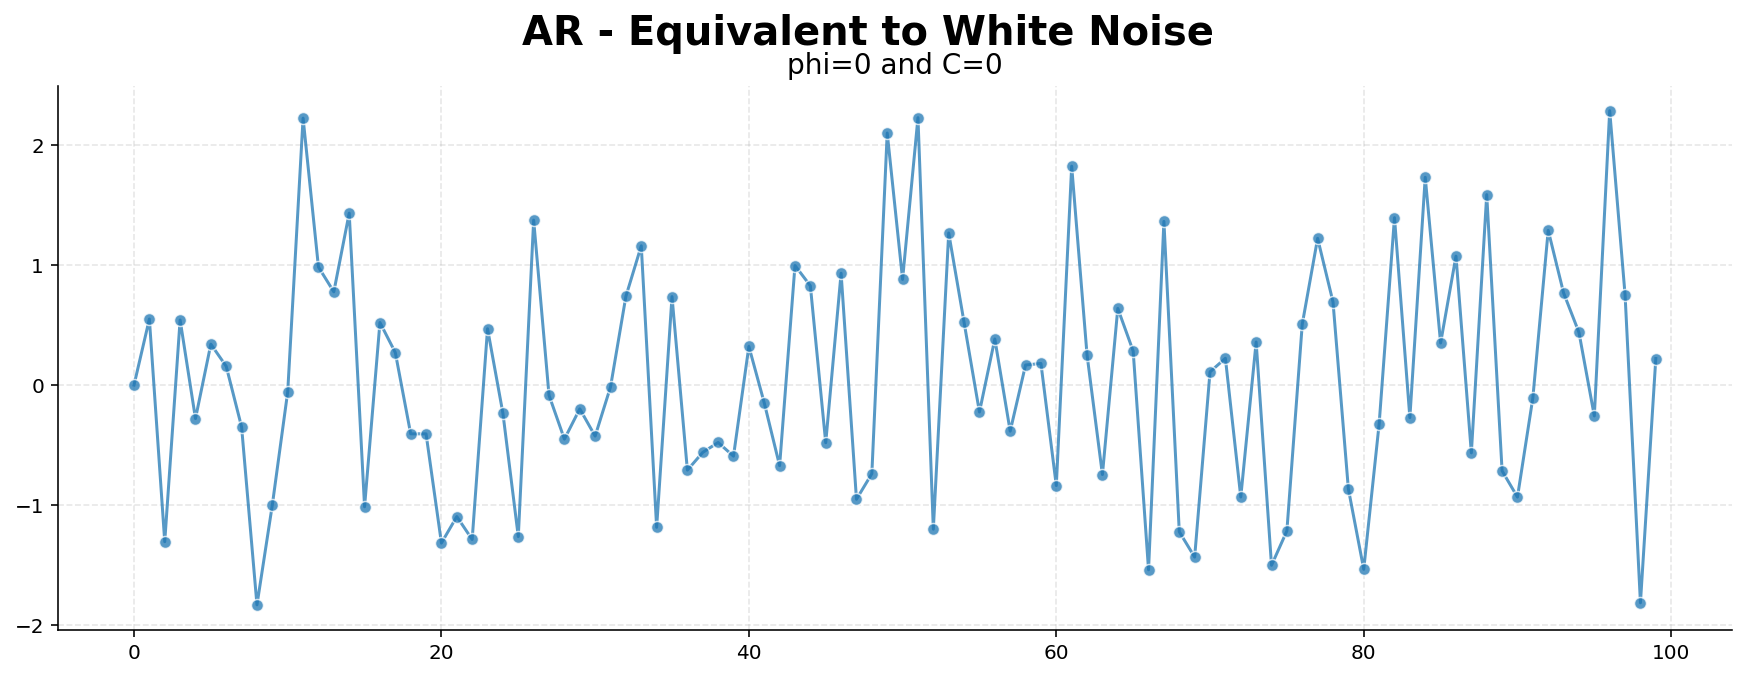

In [217]:
C = 0
PHI = 0  
ts = AR_1(C=C, PHI=PHI)
plotting(ts, C, PHI, title="AR - Equivalent to White Noise")

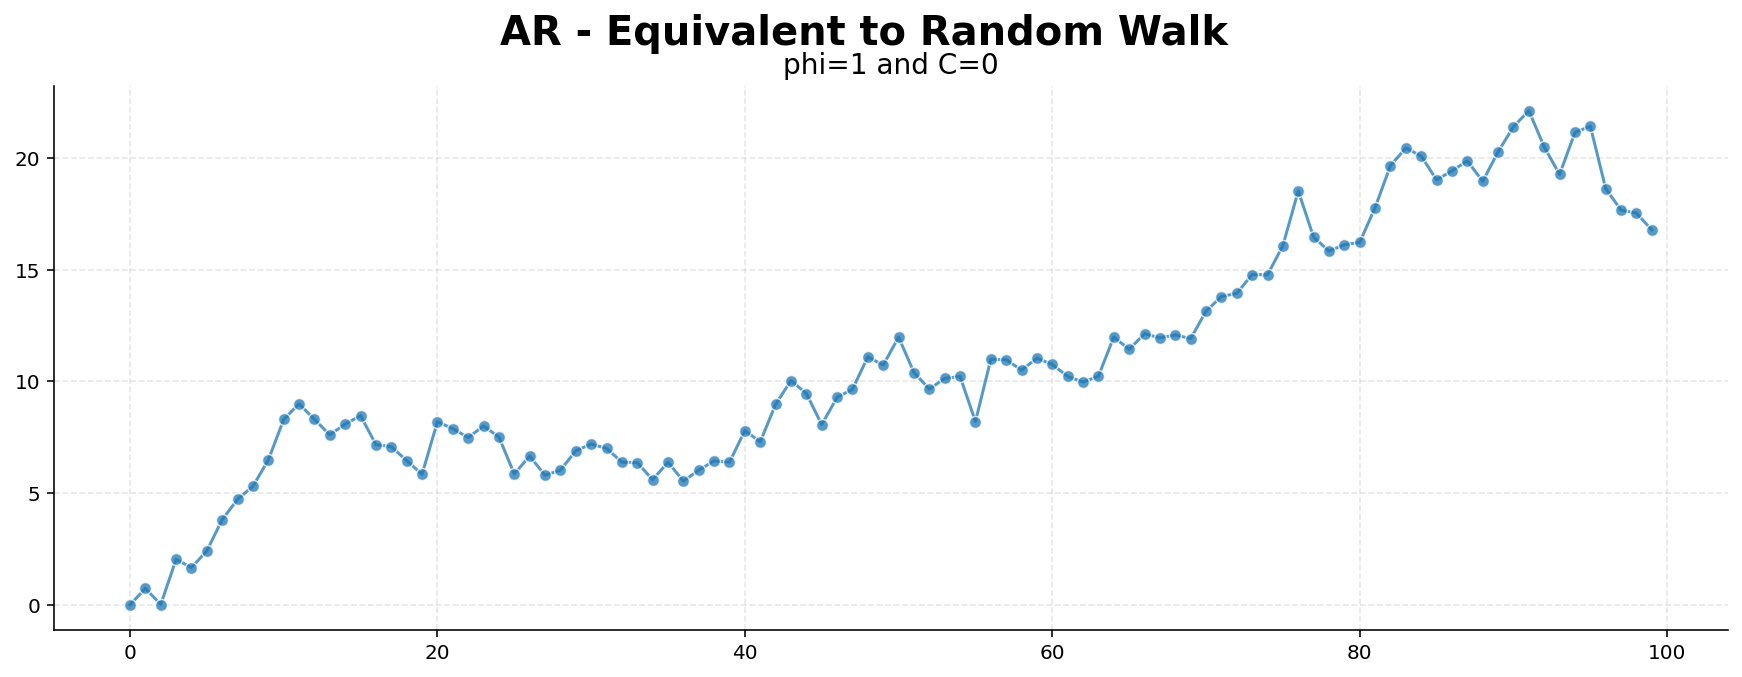

In [218]:
C = 0
PHI = 1 
ts = AR_1(C=C, PHI=PHI)
plotting(ts, C, PHI, title="AR - Equivalent to Random Walk")

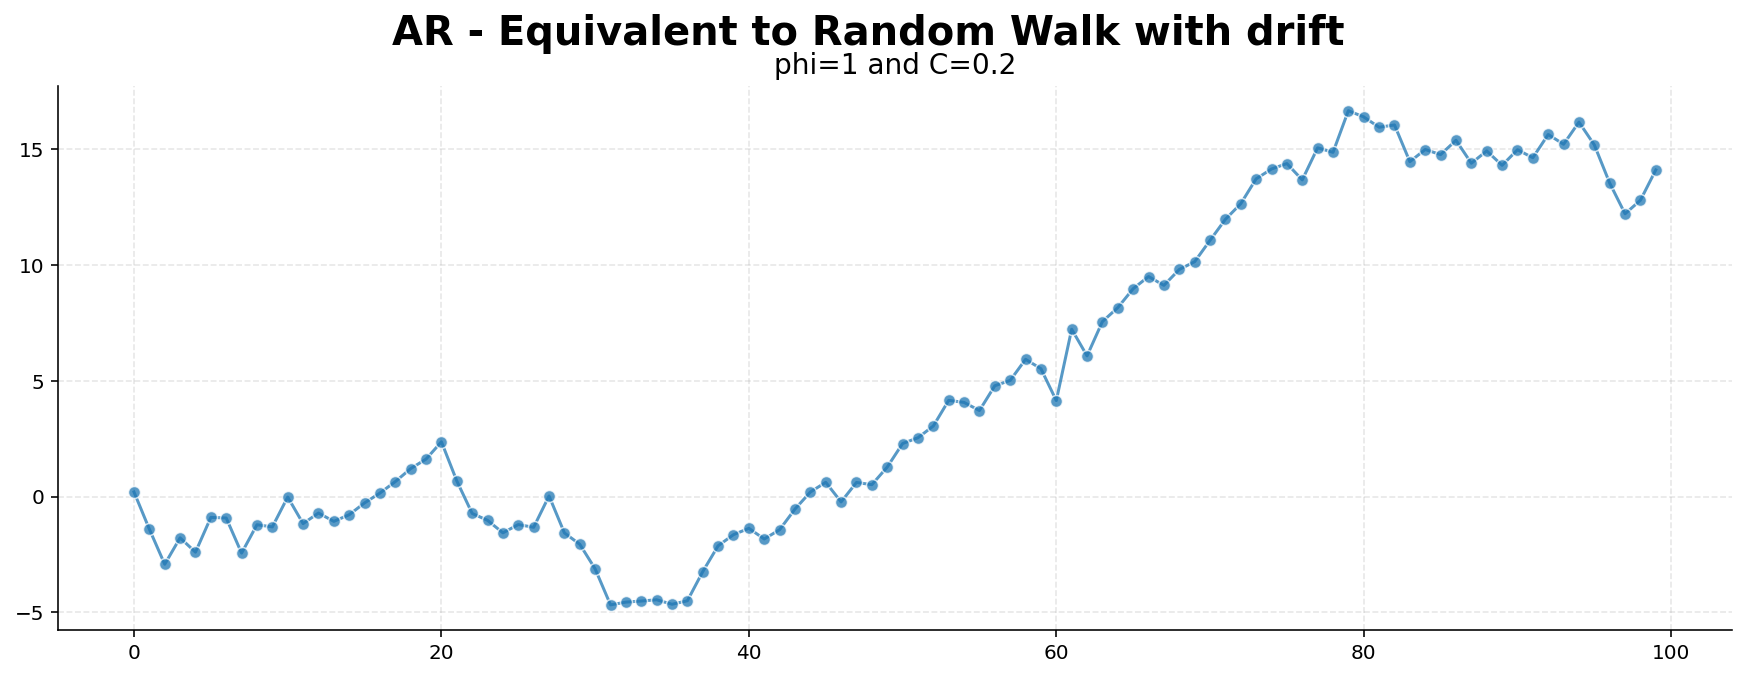

In [219]:
C = 0.2
PHI = 1 
ts = AR_1(C=C, PHI=PHI)
plotting(ts, C, PHI, title="AR - Equivalent to Random Walk with drift")

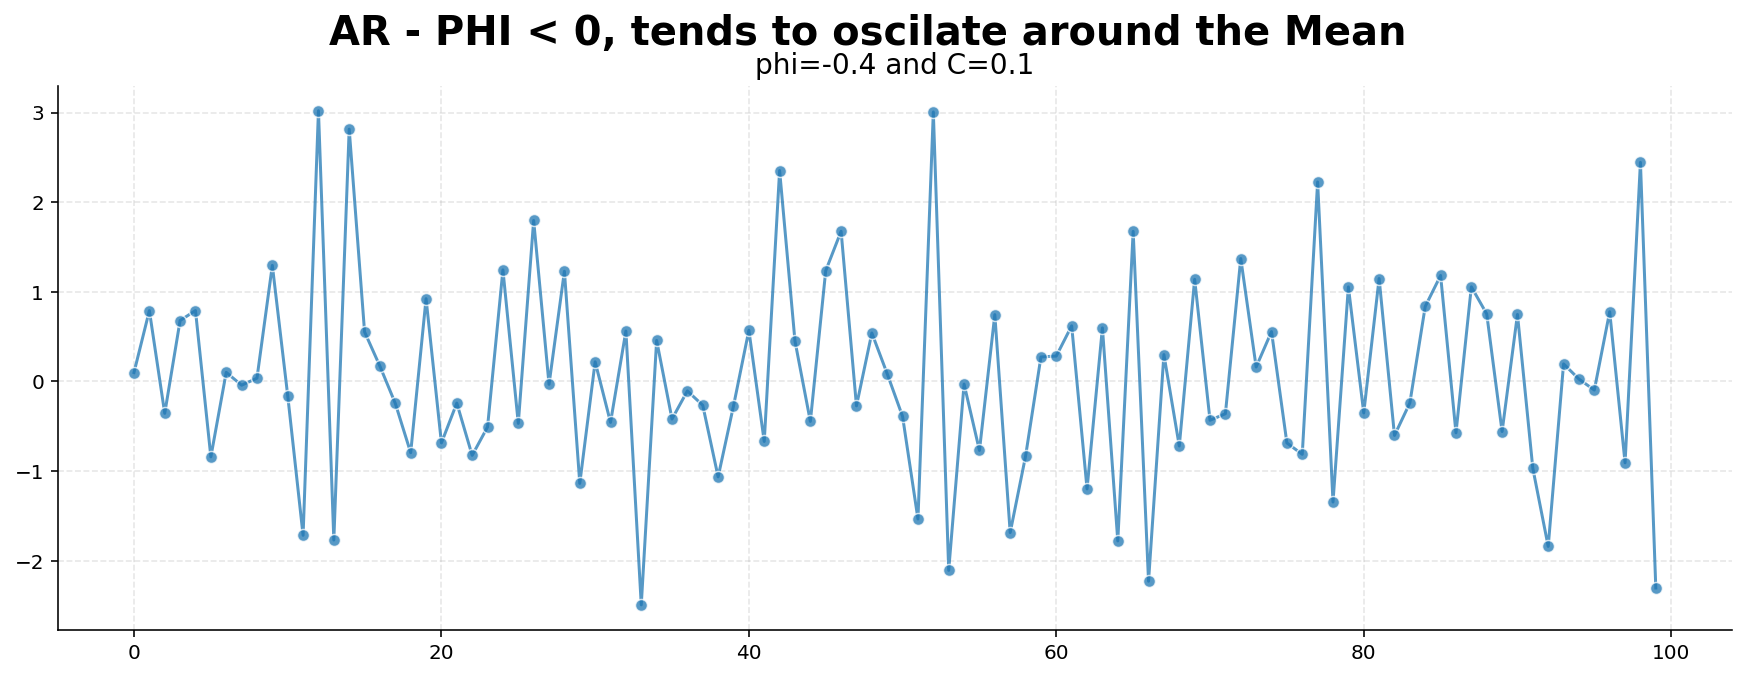

In [220]:
C = 0.1
PHI = -0.4 
ts = AR_1(C=C, PHI=PHI)
plotting(ts, C, PHI, title="AR - PHI < 0, tends to oscilate around the Mean")

In the above example, the value is always the inverse of the previous value, so it oscilates around the mean 